In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-daily-price-20112022/btc_historical_price.csv


In [21]:
import pandas as pd
data = pd.read_csv('/kaggle/input/bitcoin-daily-price-20112022/btc_historical_price.csv')
data.shape

(4138, 2)

In [22]:
data.head()

,date,price
0,2011-01-01,0.300
1,2011-01-02,0.300
2,2011-01-03,0.295
3,2011-01-04,0.299
4,2011-01-05,0.299


In [23]:
data = data.set_index('date')
data.head()

,price
date,
2011-01-01,0.300
2011-01-02,0.300
2011-01-03,0.295
2011-01-04,0.299
2011-01-05,0.299


In [24]:
data.head()

,price
date,
2011-01-01,0.300
2011-01-02,0.300
2011-01-03,0.295
2011-01-04,0.299
2011-01-05,0.299


<AxesSubplot:xlabel='date'>

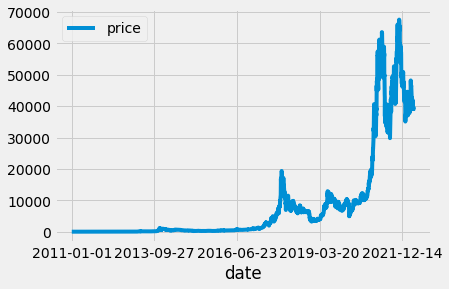

In [25]:
data.plot()

In [27]:
rolling = data.rolling(30).mean()

<AxesSubplot:xlabel='date'>

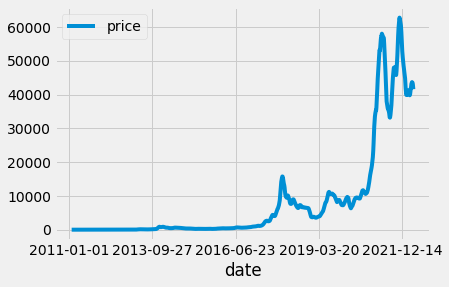

In [28]:
rolling.plot()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

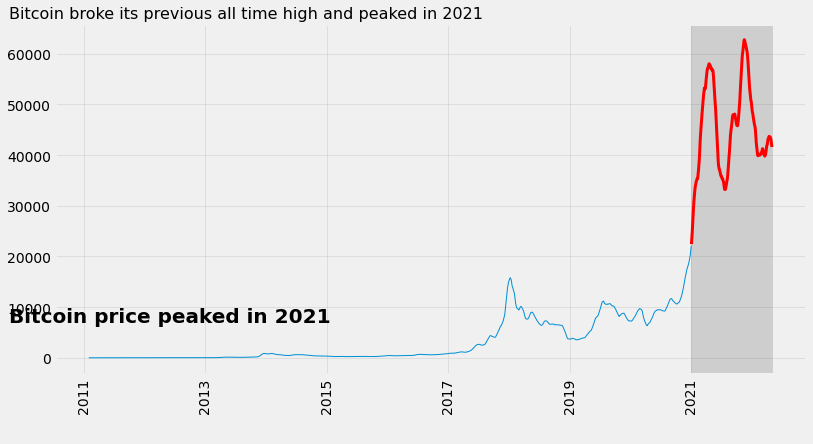

In [31]:
pre_2021 = rolling.loc[: '2020-12-31']
post_2021 = rolling.loc['2021-01-01':]

fig, ax = plt.subplots(figsize = (12,6))

ax.plot(pre_2021.index.values, pre_2021['price'], linewidth=1)
ax.plot(post_2021.index.values, post_2021['price'], linewidth=3, color='red')

ax.axvspan(xmin=3653, xmax=485+3653, alpha = 0.3, color = 'grey')

ticks = ['2011-01-01', '2013-01-01','2015-01-01','2017-01-01', '2019-01-01', '2021-01-01']
tick_labels = ['2011', '2013','2015','2017', '2019', '2021']

plt.xticks(ticks, rotation = 'vertical')
ax.set_xticklabels(tick_labels)

ax.grid(alpha=0.5)

ax.text(-450, 7100, 'Bitcoin price peaked in 2021', fontsize = 20, weight = 'bold')
ax.text(-450, 67000, 'Bitcoin broke its previous all time high and peaked in 2021', fontsize = 16)
ax.text(-450, -15000, ' '*160, size = 14)

plt.show()
